In [18]:
from omegaconf import OmegaConf

from PIL import Image
from torchvision import transforms
import torch
import torch.nn as tcnn
import torch.nn.functional as TF
import matplotlib.pyplot as plt

from utils import instantiate_from_config

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
config = OmegaConf.load("./configs/vqgan_infer.yaml")
model = instantiate_from_config(config.model)
ckpt = torch.load("./checkpoints/torch/vqgan.ckpt")
model.load_state_dict(ckpt, strict=True)

Working with z of shape (1, 3, 64, 64) = 12288 dimensions.


<All keys matched successfully>

In [47]:
img = Image.open('./data/landscape/train_val/images/2646805097_eb44cb33b8_b.jpg').convert("RGB")
seg = Image.open('./data/landscape/train_val/labels/2646805097_eb44cb33b8_b.png')
transform = transforms.Compose([
    transforms.Resize(384),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x - 0.5) * 2),
])
img = transform(img).unsqueeze(0)
seg = transforms.Resize(384)(seg)
segme = transforms.ToTensor()(seg).long()
segme = TF.one_hot(segme, num_classes=29).permute(0, 3, 1, 2).float().cuda()
print(img.shape, segme.shape)

torch.Size([1, 3, 384, 512]) torch.Size([1, 29, 384, 512])


In [50]:
model.eval()
quant = model.encode(img)
print(quant.shape)

torch.Size([1, 3, 96, 128])


In [51]:
rec = model.decode(quant)

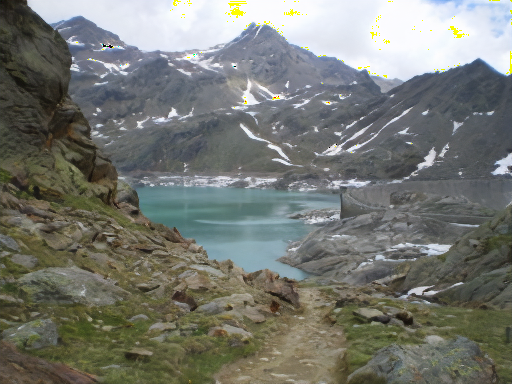

In [53]:
transforms.ToPILImage()((rec[0] + 1) / 2)